In [1]:
library("rio")
library("ggplot2")
library("forecast")
library("tseries")
library("tidyverse")
library(readxl)
library(zoo)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  2.0.1     v purrr   0.3.0
v tidyr   0.8.2     v dplyr   0.7.8
v readr   1.3.1     v stringr 1.3.1
v tibble  2.0.1     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



In [187]:
data <- read.csv("Monthly_data_cmo.csv")
data <- data.frame(data)

data <- data[order(data[,9]),]

data <- subset(data, select =-c(state_name))

In [164]:
data$arrivals_in_qtl = tsclean(ts(data[, c('arrivals_in_qtl')]))
data$min_price = tsclean(ts(data[, c('min_price')]))
data$max_price = tsclean(ts(data[, c('max_price')]))
data$modal_price = tsclean(ts(data[, c('modal_price')]))

In [189]:
data1 <- subset(data, APMC =="Ahmednagar")
# data2015 <- subset(data, Year ==2015)
# data2016 <- subset(data, Year ==2016)

data1 <- subset(data1, Commodity =="Bajri")

data1$arrivals_in_qtl = tsclean(ts(data1[, c('arrivals_in_qtl')]))

data1$min_price = tsclean(ts(data1[, c('min_price')]))

data1$max_price = tsclean(ts(data1[, c('max_price')]))
data1$modal_price = tsclean(ts(data1[, c('modal_price')]))

head(data1)

str(data1)

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name
3956,Ahmednagar,Bajri,2014,September,24,1400,1750,1575,2014-09,Ahmadnagar
3135,Ahmednagar,Bajri,2014,November,395,1507,1750,1629,2014-11,Ahmadnagar
1389,Ahmednagar,Bajri,2015,January,97,1472,1764,1618,2015-01,Ahmadnagar
1046,Ahmednagar,Bajri,2015,February,10,1500,1800,1650,2015-02,Ahmadnagar
2471,Ahmednagar,Bajri,2015,March,14,1350,1700,1525,2015-03,Ahmadnagar
1,Ahmednagar,Bajri,2015,April,79,1406,1538,1463,2015-04,Ahmadnagar


'data.frame':	22 obs. of  10 variables:
 $ APMC           : Factor w/ 349 levels "Aamgaon","Aarni",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ Commodity      : Factor w/ 352 levels "AMBAT CHUKA",..: 25 25 25 25 25 25 25 25 25 25 ...
 $ Year           : int  2014 2014 2015 2015 2015 2015 2015 2015 2015 2015 ...
 $ Month          : Factor w/ 12 levels "April","August",..: 12 10 5 4 8 1 7 6 2 12 ...
 $ arrivals_in_qtl: Time-Series  from 1 to 22: 24 395 97 10 14 79 141 213 24 51 ...
 $ min_price      : Time-Series  from 1 to 22: 1400 1507 1472 1500 1350 1406 1311 1503 1615 1438 ...
 $ max_price      : Time-Series  from 1 to 22: 1750 1750 1764 1800 1700 1538 1404 1578 1615 1588 ...
 $ modal_price    : Time-Series  from 1 to 22: 1575 1629 1618 1650 1525 1463 1382 1578 1615 1553 ...
 $ date           : Factor w/ 27 levels "2014-09","2014-10",..: 1 3 5 6 7 8 10 11 12 13 ...
 $ district_name  : Factor w/ 33 levels "Ahmadnagar","Akola",..: 1 1 1 1 1 1 1 1 1 1 ...


Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.
Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.


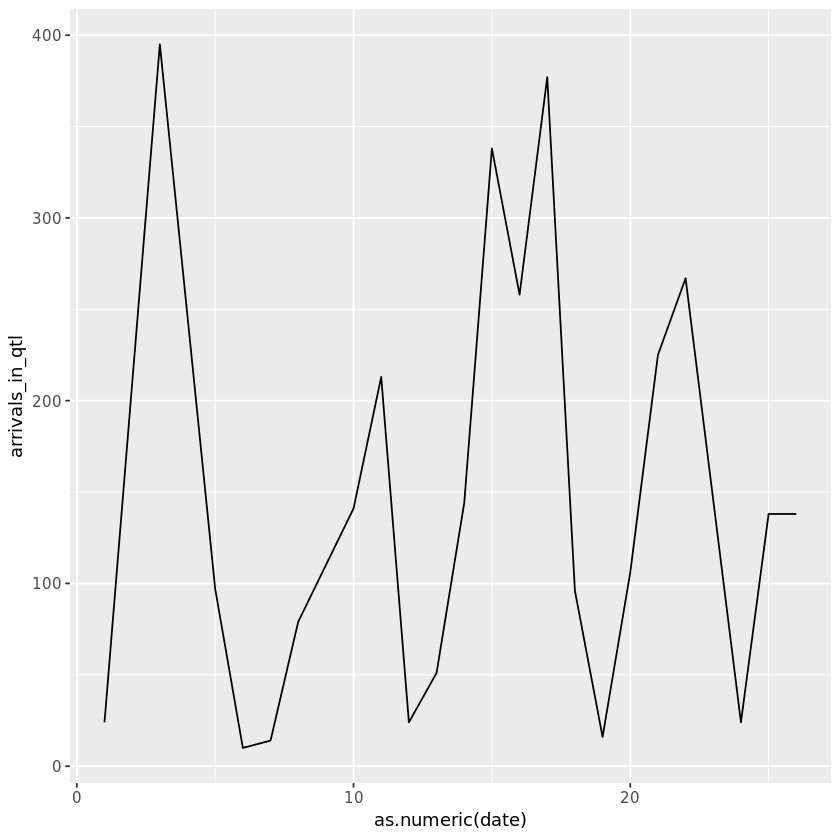

Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.


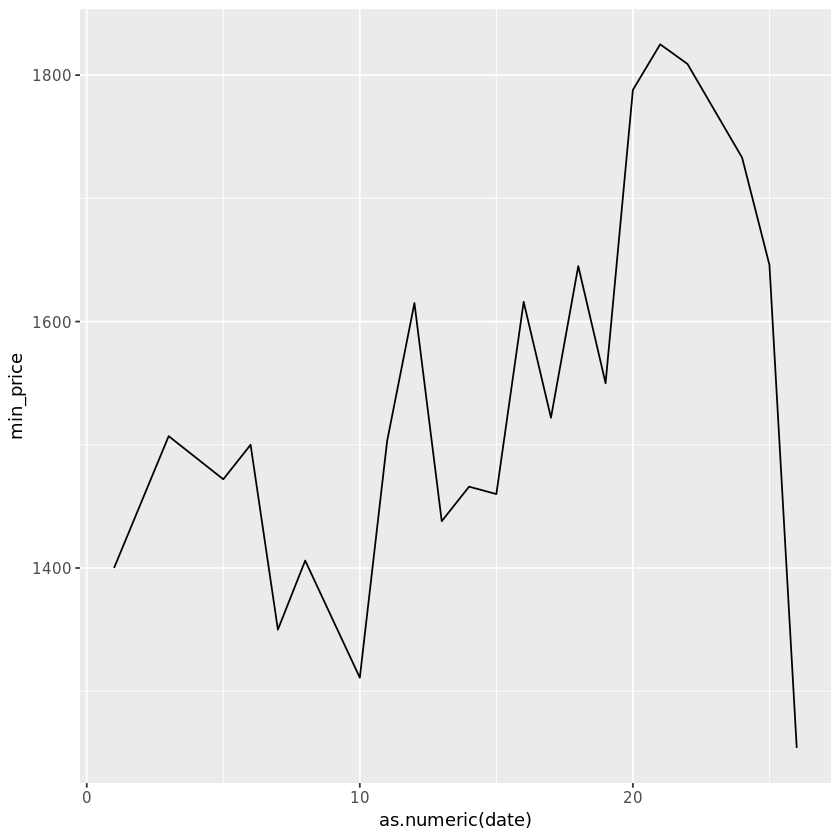

Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.


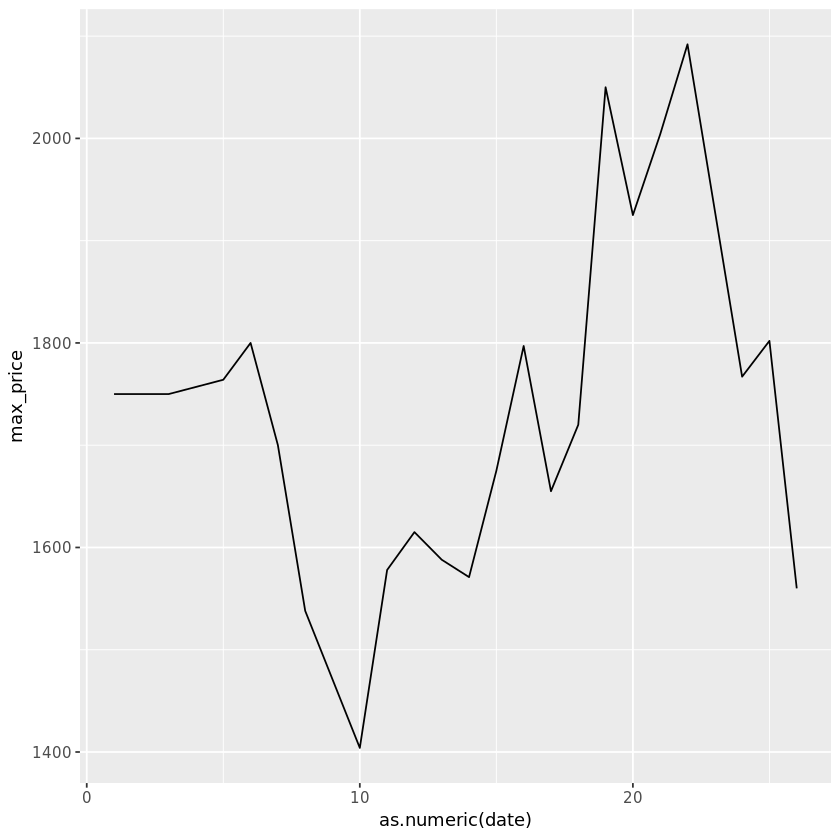

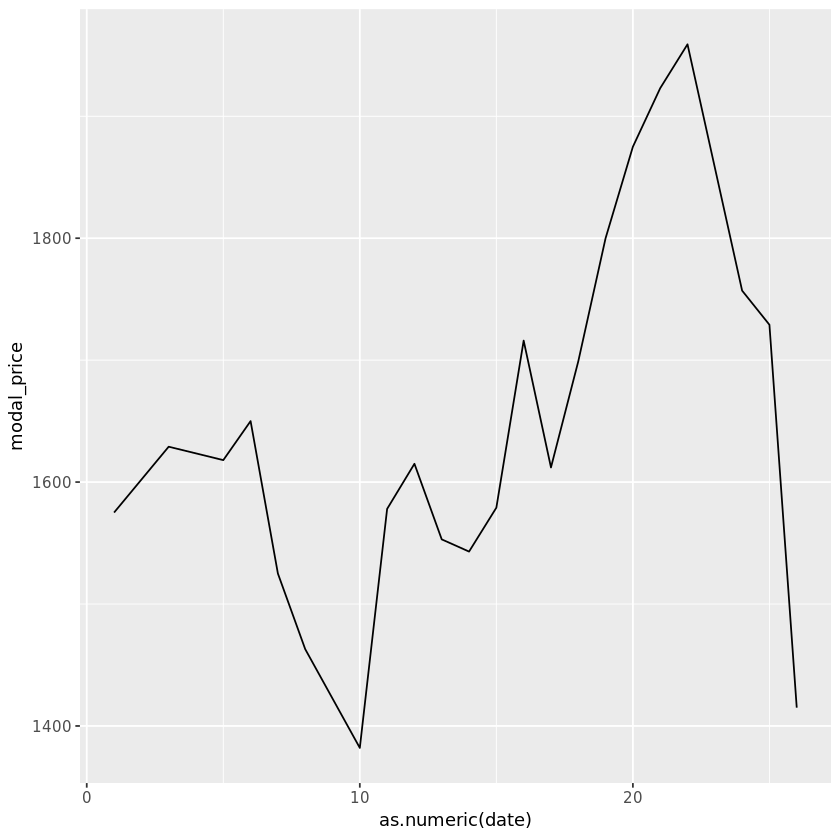

In [190]:
ggplot() +
geom_line(data= data1 , aes(y = arrivals_in_qtl , x= as.numeric(date)))

ggplot() +
geom_line(data= data1 , aes(y = min_price , x= as.numeric(date)))

ggplot() +
geom_line(data= data1 , aes(y = max_price , as.numeric(date)))

ggplot() +
geom_line(data= data1 , aes(y = modal_price , as.numeric(date)))

DECOMPOSITION


	Augmented Dickey-Fuller Test

data:  count_ma
Dickey-Fuller = -3.5741, Lag order = 2, p-value = 0.0536
alternative hypothesis: stationary


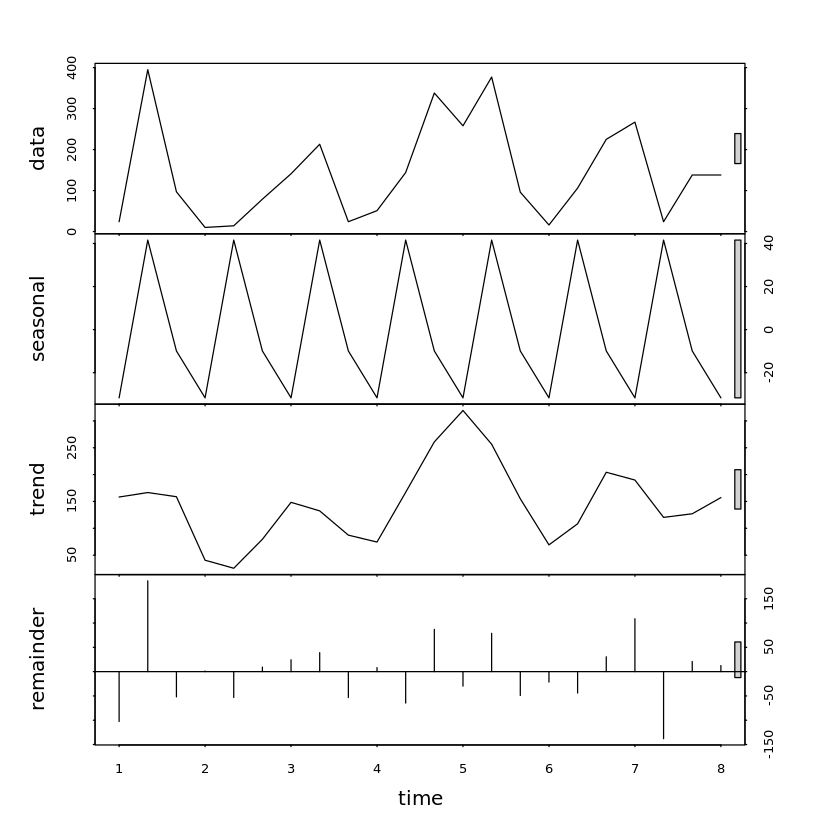

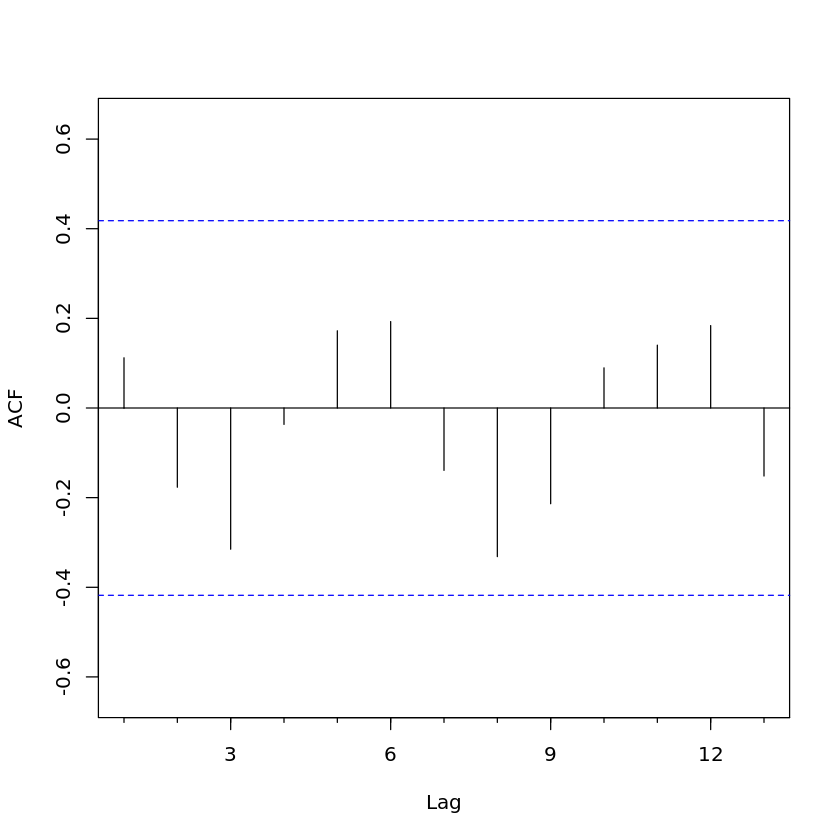

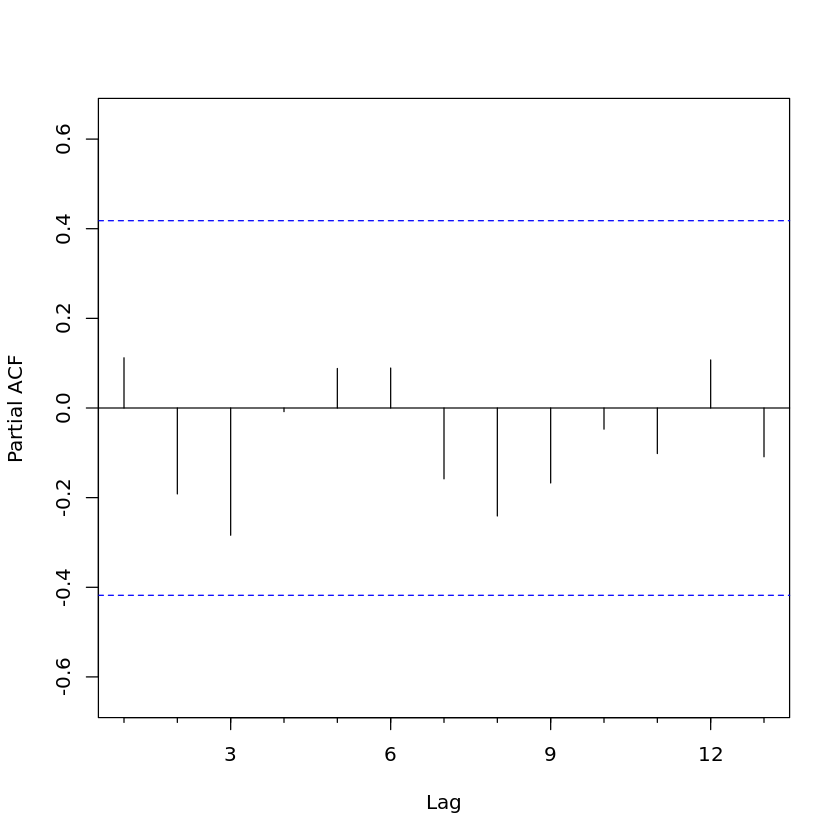

In [191]:
count_ma = ts(na.omit(data1$arrivals_in_qtl),frequency = 3)
decomp = stl(count_ma,"periodic")


deseasonal_cnt <- seasadj(decomp)
plot(decomp)

adf.test(count_ma,alternative = "stationary")

Acf(count_ma, main='')

Pacf(count_ma, main='')

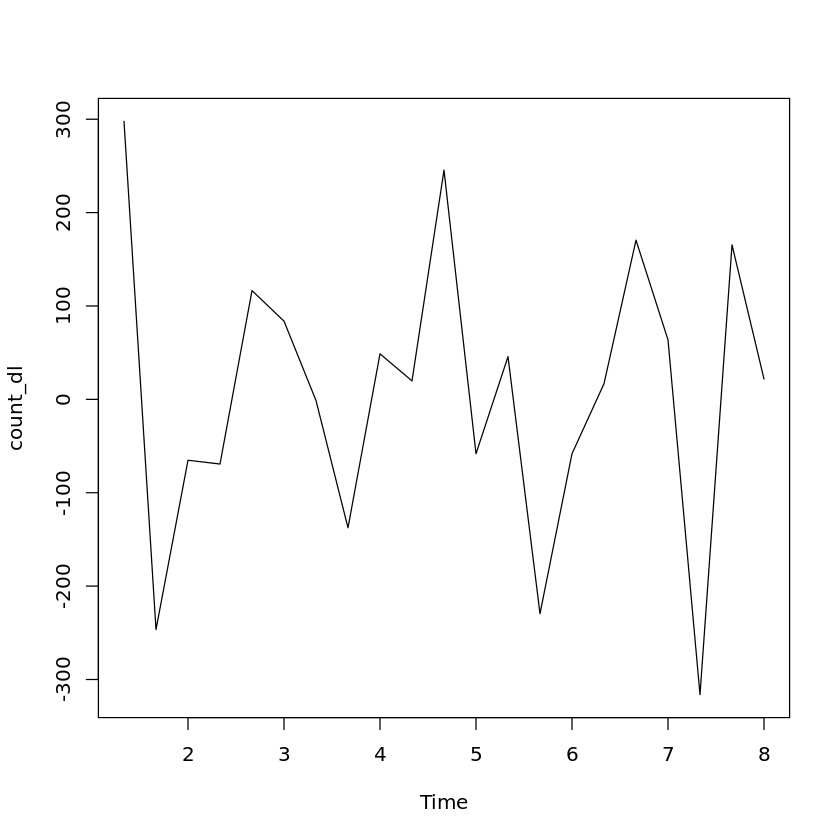

In [192]:
count_dl = diff(deseasonal_cnt,differences = 1)
plot(count_dl)

In [193]:
adf.test(count_dl,alternative = "stationary")

Warning message in adf.test(count_dl, alternative = "stationary"):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  count_dl
Dickey-Fuller = -5.0322, Lag order = 2, p-value = 0.01
alternative hypothesis: stationary


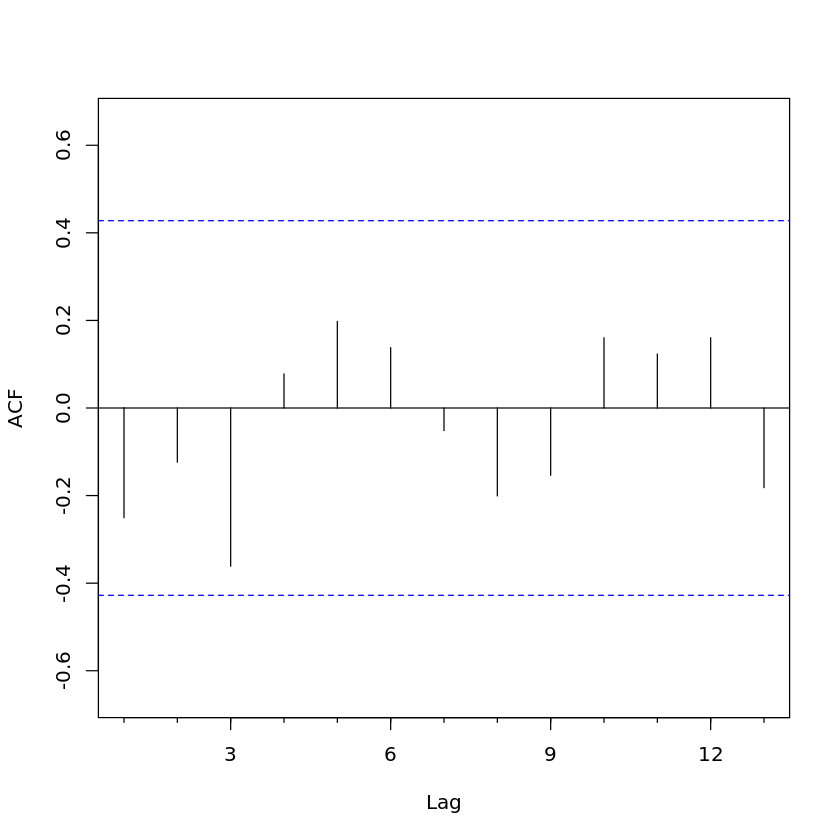

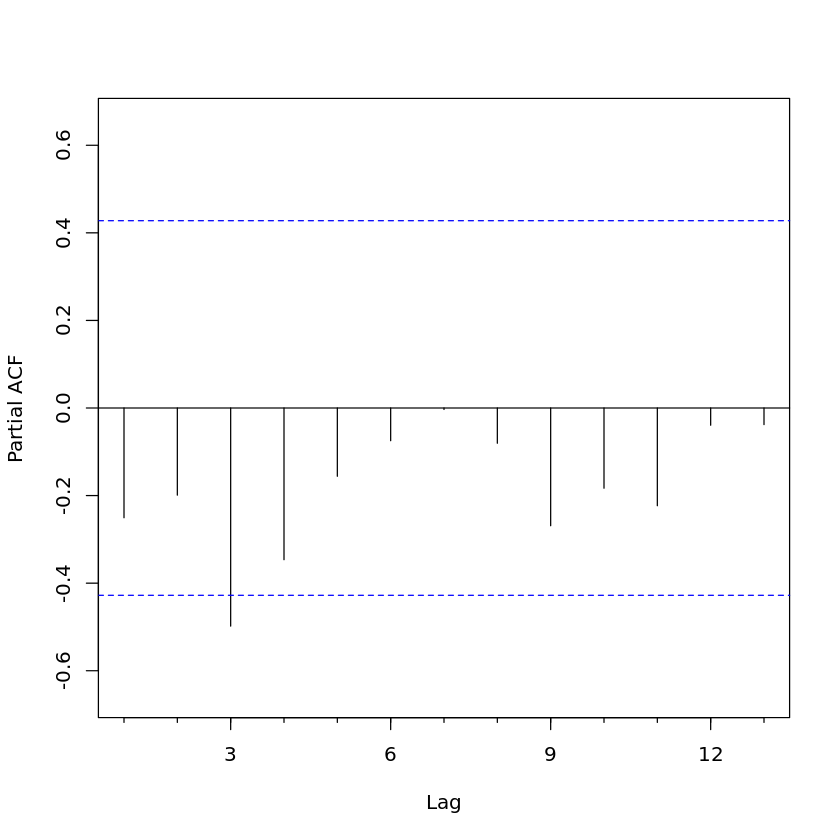

In [194]:
Acf(count_dl, main='')
Pacf(count_dl, main='')